In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_c1afa6f594f24607a7ed122941f70b7e = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_c1afa6f594f24607a7ed122941f70b7e = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_c1afa6f594f24607a7ed122941f70b7e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='eQcM7jrmYpCicb1z7hp2FEOO9lZQNXOieKYY4nzi3Xst',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_c1afa6f594f24607a7ed122941f70b7e)

body = client_c1afa6f594f24607a7ed122941f70b7e.get_object(Bucket='fooddemandforecasting-donotdelete-pr-n3jldarqkccnki',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train = pd.read_csv(body)
train.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [3]:

body = client_c1afa6f594f24607a7ed122941f70b7e.get_object(Bucket='fooddemandforecasting-donotdelete-pr-n3jldarqkccnki',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test = pd.read_csv(body)
test.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [4]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [5]:
test.shape

(32573, 8)

In [6]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [7]:
train.shape

(456548, 9)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [9]:
train.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [10]:
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [11]:

body = client_c1afa6f594f24607a7ed122941f70b7e.get_object(Bucket='fooddemandforecasting-donotdelete-pr-n3jldarqkccnki',Key='meal_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

meal_info = pd.read_csv(body)
meal_info.head()


,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [12]:

body = client_c1afa6f594f24607a7ed122941f70b7e.get_object(Bucket='fooddemandforecasting-donotdelete-pr-n3jldarqkccnki',Key='fulfilment_center_info.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

center_info = pd.read_csv(body)
center_info.head()


,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [13]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [14]:
center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [15]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [16]:
trainfinal = pd.merge(train, meal_info, on='meal_id', how='outer')
trainfinal = pd.merge(trainfinal, center_info, on='center_id', how='outer')

In [17]:
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [18]:
trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)

In [19]:
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [20]:
np.unique(trainfinal['category'].values)

array(['Beverages', 'Biryani', 'Desert', 'Extras', 'Fish', 'Other Snacks',
       'Pasta', 'Pizza', 'Rice Bowl', 'Salad', 'Sandwich', 'Seafood',
       'Soup', 'Starters'], dtype=object)

In [21]:
cols = trainfinal.columns.tolist()
cols

['id',
 'week',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders',
 'category',
 'cuisine',
 'city_code',
 'region_code',
 'center_type',
 'op_area']

In [22]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
cols

['id',
 'week',
 'city_code',
 'region_code',
 'center_type',
 'op_area',
 'category',
 'cuisine',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders']

In [23]:
trainfinal = trainfinal[cols]

In [24]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,TYPE_C,2.0,Beverages,Thai,136.83,152.29,0,0,177
1,1018704,2,647,56,TYPE_C,2.0,Beverages,Thai,135.83,152.29,0,0,323
2,1196273,3,647,56,TYPE_C,2.0,Beverages,Thai,132.92,133.92,0,0,96
3,1116527,4,647,56,TYPE_C,2.0,Beverages,Thai,135.86,134.86,0,0,163
4,1343872,5,647,56,TYPE_C,2.0,Beverages,Thai,146.50,147.50,0,0,215


In [28]:
from sklearn.preprocessing import LabelEncoder

lb1 = LabelEncoder()
trainfinal['center_type'] = lb1.fit_transform(trainfinal['center_type'])

lb2 = LabelEncoder()
trainfinal['category'] = lb2.fit_transform(trainfinal['category'])

lb3 = LabelEncoder()
trainfinal['cuisine'] = lb3.fit_transform(trainfinal['cuisine'])

In [32]:
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,0,3,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,0,3,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,0,3,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,0,3,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,0,3,146.50,147.50,0,0,215


In [33]:
trainfinal.shape

(456548, 13)

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'num_orders Distrubution')

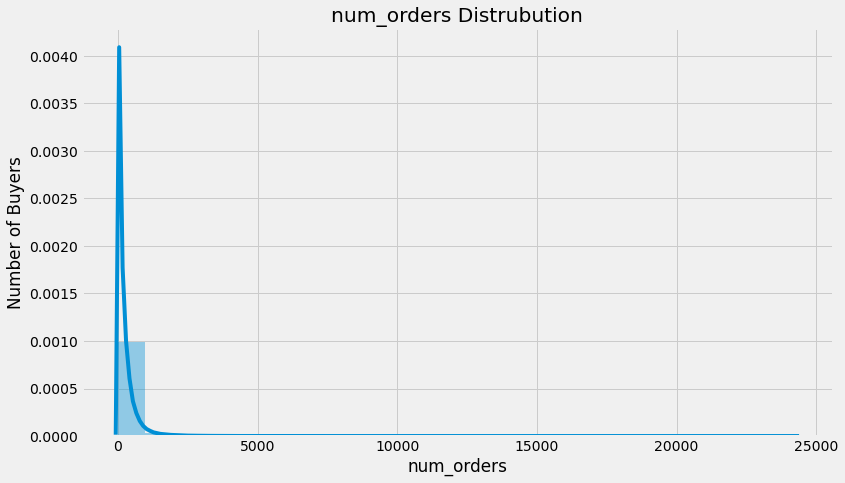

In [34]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(trainfinal.num_orders, bins=25)
plt.xlabel('num_orders')
plt.ylabel('Number of Buyers')
plt.title('num_orders Distrubution')

In [35]:
trainfinal2 = trainfinal.drop(['id'], axis=1)
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

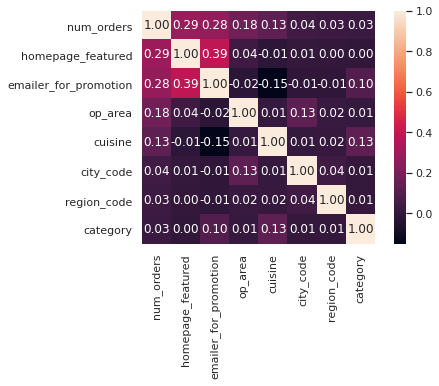

In [36]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f',
                     yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [37]:
features = columns.drop(['num_orders'])
trainfinal3 = trainfinal[features]
x=trainfinal3.values
y=trainfinal['num_orders'].values

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.25)

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [40]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 62.778423966959416


In [41]:
!pip install ibm_watson_machine_learning

In [45]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    'url': 'https://us-south.ml.cloud.ibm.com',
    'apikey': '0g8EEir-JE-uku8GIAglfyzHHydcw4mtwDWEQCxe9Iea'
}
client = APIClient(wml_credentials)

In [48]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [49]:
space_uid = guid_from_space_name(client,'demandForecastSpace')
print('Space Uid: '+space_uid)

Space Uid: d6b11b63-0e89-42a4-b8bf-3512e5e8ec34


In [51]:
client.set.default_space(space_uid)

'SUCCESS'

In [53]:
software_spec_uid = client.software_specifications.get_uid_by_name('default_py3.8')
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [54]:
model_details = client.repository.store_model(model=DT, meta_props={
    client.repository.ModelMetaNames.NAME:'demandForecastModelling',
    client.repository.ModelMetaNames.TYPE:'scikit-learn_0.23',
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid }
                                             )
model_id = client.repository.get_model_id(model_details)

In [55]:
model_id

'bf1c2811-9dbd-489a-a4cb-1e88ef86451e'

In [32]:
import pickle 
pickle.dump(DT,open('fdemand.pkl','wb'))

In [33]:
testfinal = pd.merge(test, meal_info, on='meal_id', how='outer')
testfinal = pd.merge(testfinal, center_info, on='center_id', how ='outer')
testfinal = testfinal.drop(['meal_id', 'center_id'], axis=1)

tcols = testfinal.columns.tolist()
tcols = tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
testfinal = testfinal[tcols]

lb1 = LabelEncoder()
testfinal['center_type'] = lb1.fit_transform(testfinal['center_type'])

lb2 = LabelEncoder()
testfinal['category'] = lb2.fit_transform(testfinal['category'])

lb3 = LabelEncoder()
testfinal['cuisine'] = lb3.fit_transform(testfinal['cuisine'])

x_test = testfinal[features].values

In [34]:
pred = DT.predict(x_test)
pred[pred<0] = 0
submit = pd.DataFrame({
    'id': testfinal['id'],
    'num_orders': pred
})

In [35]:
submit.to_csv('submission.csv', index=False)

In [36]:
submit.describe()

,id,num_orders
count,3.257300e+04,32573.000000
mean,1.248476e+06,263.049919
std,1.441580e+05,366.262784
min,1.000085e+06,14.500000
25%,1.123969e+06,64.500000
50%,1.247296e+06,147.120000
75%,1.372971e+06,319.195312
max,1.499996e+06,6339.789474
